<a href="https://colab.research.google.com/github/edabezek/NaturalLanguageProcessing/blob/main/NaturalLanguageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Doğal Dil İşlemenin Temelleri

**Token:** Metin , cümle içerisinde yer alan ,cümle,kelime, noktalama işaretleri ...

**Tokenize etme işlemi:** Cümleyi parçalara bölme 

**Cümle tokenize etme işlemi:** Paragrafı cümlelere ayırma

**Kelime tokenize etme işlemi:** Cümleden kelimeye ayıracak


In [ ]:
import nltk
import spacy

In [ ]:
#Sentence Tokenization
from nltk import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = """Susmayın !
Saat 16’da Kadıköy’de buluşalım.
Şiddet cahillik göstergesinin en üst sınırıdır. 
Ailede şiddet geleceği karartır.Kadına şiddet, insanlığa ihanettir.
 Her sessiz kalınan şiddet bir gün sizi bulur.
 Sevgi insanlığın, şiddet hayvanlığın kanunudur"""
 

In [ ]:
sentences = sent_tokenize(text)
for sentence in sentences :
  print(sentence)

Susmayın !
Saat 16’da Kadıköy’de buluşalım.
Şiddet cahillik göstergesinin en üst sınırıdır.
Ailede şiddet geleceği karartır.Kadına şiddet, insanlığa ihanettir.
Her sessiz kalınan şiddet bir gün sizi bulur.
Sevgi insanlığın, şiddet hayvanlığın kanunudur


In [ ]:
#Word Tokenization
from nltk import word_tokenize
sentences = ["""Susmayın!
Saat 16’da Kadıköy’de buluşalım.
Şiddet cahillik göstergesinin en üst sınırıdır.
Ailede şiddet geleceği karartır.Kadına şiddet, insanlığa ihanettir.
Her sessiz kalınan şiddet bir gün sizi bulur.
Sevgi insanlığın, şiddet hayvanlığın kanunudur"""]
for sentence in sentences :
  print(word_tokenize(sentence))

['Susmayın', '!', 'Saat', '16', '’', 'da', 'Kadıköy', '’', 'de', 'buluşalım', '.', 'Şiddet', 'cahillik', 'göstergesinin', 'en', 'üst', 'sınırıdır', '.', 'Ailede', 'şiddet', 'geleceği', 'karartır.Kadına', 'şiddet', ',', 'insanlığa', 'ihanettir', '.', 'Her', 'sessiz', 'kalınan', 'şiddet', 'bir', 'gün', 'sizi', 'bulur', '.', 'Sevgi', 'insanlığın', ',', 'şiddet', 'hayvanlığın', 'kanunudur']


**Gövdeleme :**( Stemming ) Porter stemmer (1980)

Kelime : argue, argued, argues, arguing

Hedeflenen kelime : argue

Porter Stemmer sonucu : argu


In [ ]:
#Stemming  Porter Modülü 
#civilizations -> civil
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()
world = "civilizations"
porter_stemmer.stem(world)

'civil'

In [ ]:
#Stemming Snowball Modülü
#civilizations -> civil
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")
world = "civilizations"
stemmer.stem(world)

'civil'

In [ ]:
#Stemming Snowball Modülü
#ekmek-ler -> ekmek
from snowballstemmer import TurkishStemmer
turkish_stem = TurkishStemmer()
turkish_stem.stemWord("ekmekler")

'ekmek'

In [ ]:
#çiçek-lik-ler -> çiçeklik
turkish_stem.stemWord("çiçeklikler")

'çiçeklik'

In [ ]:
#Baş Sözcük Çıkarma (Lemmatization)
#civilization-s -> civil
import spacy
nlp = spacy.load("en_core_web_sm")
world =nlp("civilizations")
for token in world :
  print(token.lemma_)

civilization


**Etkisiz Kelimeler (Stop Words)**
İngilizce için bazı örnek etkisiz kelimeler:

• a, the, of, in, at

• Fonksiyonel kelimeler

• İçeriksel kelimeler

In [ ]:
#Etkisiz Kelime Listesi
import spacy 
nlp = spacy.load("en_core_web_sm")
len(nlp.Defaults.stop_words)

326

In [ ]:
swList = list(nlp.Defaults.stop_words)
print(swList[:10])

['however', '‘m', 'a', '’m', 'once', 'was', 'us', 'five', 'at', 'we']


In [ ]:
#Etkisiz kelime kontrolu 
nlp.vocab["of"].is_stop

True

In [ ]:
nlp.vocab["civilizations"].is_stop

False

In [ ]:
#Etkisiz Kelime Ekleme
nlp.Defaults.stop_words.add("civilizations")
nlp.vocab["civilizations"].is_stop=True

In [ ]:
nlp.vocab["civilizations"].is_stop


True

In [ ]:
len(nlp.Defaults.stop_words)

327

In [ ]:
#Etkisiz Kelime Çıkarma
nlp.Defaults.stop_words.remove("of")
nlp.vocab["of"].is_stop = False

In [ ]:
len(nlp.Defaults.stop_words)

326

In [ ]:
#Türkçe Etkisiz Kelime Listesi
from nltk.corpus import stopwords
nltk.download('stopwords')
etkisiz = stopwords.words("turkish")
print(etkisiz[-10:])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [ ]:
etkisiz.extend(["üç","dört","beş"])
print(etkisiz[-10:])

['siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'üç', 'dört', 'beş']


#2.Sözcük Türleri (POSTags) ve Varlık İsmi Tanıma (NER)

**Sözcük Türü İşaretleme (POSTagging):** 

•POS: Part-of-speech -sözcük türü
•POSTagging: Sözcük türü işaretleme
•Sözcük Türleri: Sıfat, nesne, yüklem, bağlaç vb.
•Amaç: Her kelimenin sözcük türünü işaretlemek

**Sözcük Türleri (POSTags):**

ADJ (Sıfat–Adjective),
PART (Edat/Ek –Particle),
ADP(Edat –Adposition),
PRON (Zamir –Pronoun),
ADV (Zarf –Adverb),
PROPN (Özelisim –Proper Noun),
AUX (Yardımcı/Ekfiil –Auxiliary),
PUNCT ( Noktalama işareti –Punctuation),
CCONJ (Bağlaç –CoordinatingConjunction),
SCONJ(Yantümce bağlacı -Subordinating Conjunction),
DET (Belirteç –Determiner),
SYM (Sembol –Symbol),
INTJ (Ünlem-Interjection),
VERB (Yüklem –Verb),
NOUN(İsim -Noun),
X (Diğer –Other),
NUM (Sayı–Numeral).


**Sözcük Türü İşaretleme (POSTagging) Yaklaşımları:**

•Kural Tabanlı

•Stokastik

Üretken Model (Generative Model)

Ayırıcı Model (Discriminative Model)




In [ ]:
#Sözcük Türü İşaretleme (POSTagging)
#Örnek Cümle: «Can you buy me a red chili pepper from grocery?»
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tokens = nltk.word_tokenize("Can you buy me a red chili pepper from grocery?")
print("Part of speech :", nltk.pos_tag(tokens))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Part of speech : [('Can', 'MD'), ('you', 'PRP'), ('buy', 'VB'), ('me', 'PRP'), ('a', 'DT'), ('red', 'JJ'), ('chili', 'NN'), ('pepper', 'NN'), ('from', 'IN'), ('grocery', 'NN'), ('?', '.')]


In [ ]:
#Örnek Cümle: «I want an early upgrade»
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("I want an early upgrade")
for token in doc :
  print(token.text,token.pos_)

I PRON
want VERB
an DET
early ADJ
upgrade NOUN


**Varlık İsmi Tanıma (NER-Named Entity Recognition):**Amaç: Metinde geçen varlık isimlerini işaretlemek
1.Varlık ismi bulma
2.Varlık ismi sınıfını işaretleme

**Varlık İsimleri (Named Entities)**

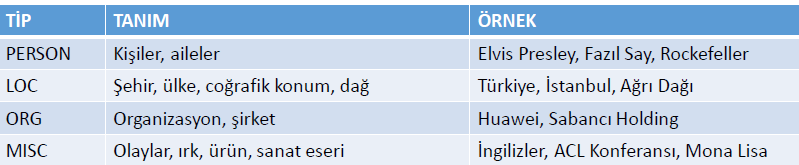


**Varlık İsmi Tanıma (NER) Yaklaşımları**

i.Kural Tabanlı Yaklaşımlar

•Kural Türetilmesi

•Alt Eşleşmeler

•Alana Özel İsim Varlık Sözlüğü

ii.İstatistiksel Modeller

a.Dizi Etiketleme (Sequence Labelling)

b.Özellik Tabanlı (Feature-Based) Algoritmalar


In [ ]:
#Varlık İsmi Tanıma (NER) ile İlgili Çalışmalar
#Örnek Cümle: Legendary scientist Albert Einstein is born in Ulm, Germany.
import nltk
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sentence = "Legendary scientist Albert Einstein is born in Ulm, Germany."
tokens = nltk.word_tokenize(sentence)
tagged_tokens = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged_tokens)
print(entities)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  Legendary/JJ
  scientist/NN
  (PERSON Albert/NNP Einstein/NNP)
  is/VBZ
  born/VBN
  in/IN
  (GPE Ulm/NNP)
  ,/,
  (GPE Germany/NNP)
  ./.)


In [ ]:
#Örnek Cümle: Michael Jordan is a professor at Berkeley.
import spacy 
from spacy import displacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
sentence = nlp("Michael Jordan is a professor at Berkeley.")
print([(X.text,X.label_)for X in sentence.ents])

[('Michael Jordan', 'PERSON'), ('Berkeley', 'GPE')]


#3.Metin Sınıflandırma (Text Classification) ve Kümeleme (Clustering)


**Metin Önişleme (Text Preprocessing):**

**A.Tokenize Etme İşlemi (Tokenization)**

**B.Metin Temizleme (Text Cleaning):**Noktalama İşaretlerinin ve Özel Karakterlerin Kaldırılması ,Etkisiz Kelimelerin (Stop words)Temizlenmesi, Sık ve nadir kullanılan kelimelerin çıkarılması 

**C.Metin Normalizasyonu (Text Normalization):** Küçük Harf yapılması ,Kuraldışı Kelimelerin Düzeltilmesi (Conversion of non-canonical words),Yazım Hataları (Spellcheck)

**D.Gövdeleme (Stemming) ve Baş Sözcük Çıkarma (Lemmatization):**


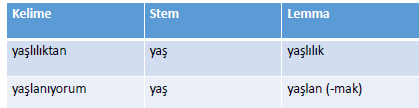

**Metin Öznitelik Çıkarımı (Feature Extraction)**

**A.Temel İstatistikler:** Token istatistikleri : Kelime sayısı-toplam veya ortalama cümle başına,Etkisiz kelimelerin sayısı, Büyük harf ile yazılmış kelimelerin sayısı ,Sayısal ifadelerin sayısı.Karakter istatistikleri : Cümle karakter sayısı,Ortalama kelime uzunluğu,Özel karakter sayısı.

*  Hissiyat Analizi(Sentiment Analysis): 

Negatif yorum: Filmin yorumları her yerde çok iyiydi o nedenle
gittim ama maalesef hayal kırıklığına uğradım.
Toplam kelime sayısı: 14

Pozitif yorum: Son zamanlarda izlediğim en güzel komedi filmi.
Toplam kelime sayısı: 7

**B.Kelime çantası (Bag of words-BoW) Modeli:**

Örnek Metin:
En güzel zamanlardı,
En kötü zamanlardı,
Bilgelik çağıydı,
Aptallık çağıydı.

Kelime Listesi = [‘en’, ‘güzel’, ‘zamanlardı’,
‘kötü’, ‘bilgelik’, ‘çağıydı’, ‘aptallık’]

**C.Terim Frekansı / Ters Metin Frekansı (Term Frequency-Inverse Document Frequency -TF/IDF)Skorlama Modeli :**


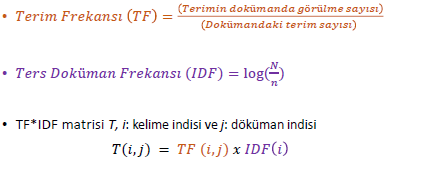


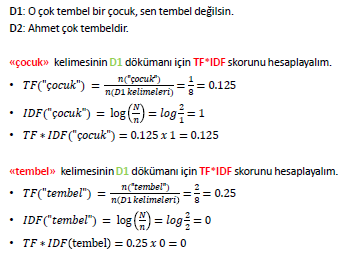

**D.N-gram Modeli:** 

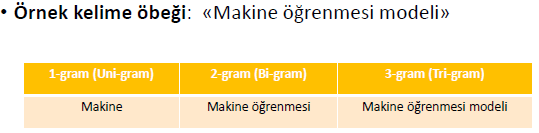


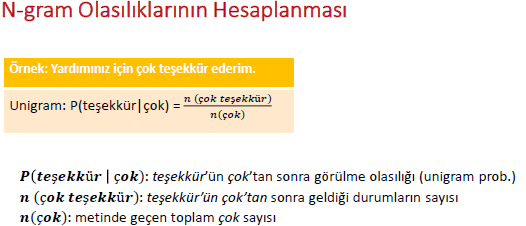

**Metin Temsili (Text Representation)**  
• Örnek Cümle = ”Kelime temsilleri, kelimelerin sayılara dönüştürülmüş formudur.”

• Kelime Listesi = [‘kelime’, ‘temsil’, ‘sayı’, ‘dönüştürmek’, ‘form’]

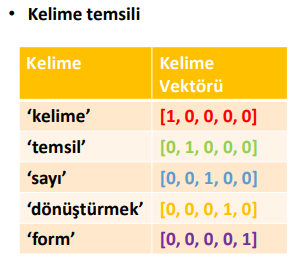





**A.Frekans tabanlı temsiller(Frequency-based representations):**

i. Kelime çantası modeli ve sayma vektörleri (Bag-of-words model and count vectors)

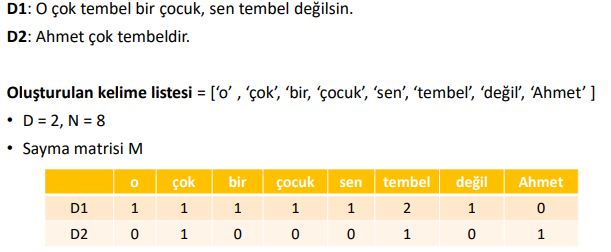



ii. TF-IDF vektörizasyonu (TF*IDF vectorization)

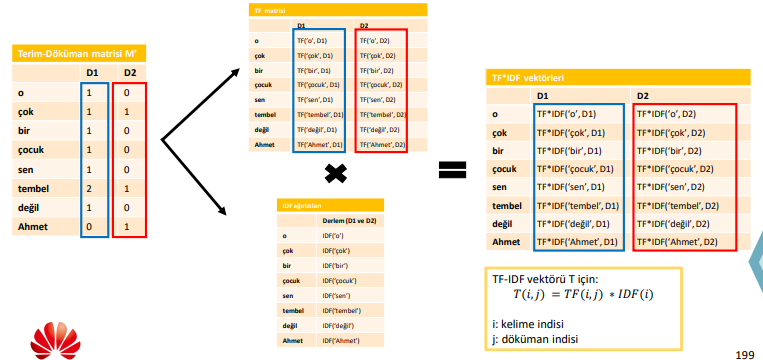




iii. Eş-oluşum matrisleri (Co-occurence matrix)

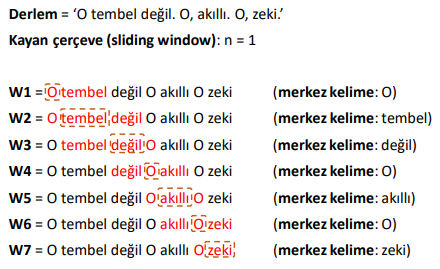










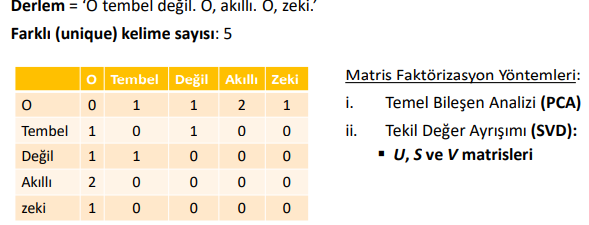

**B.Tahminleme tabanlı temsiller(Prediction-based representations):**

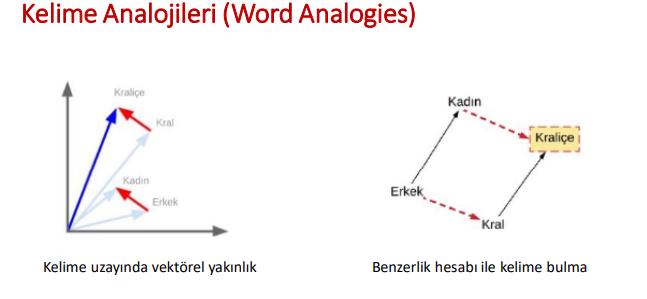

i. Word2vec

• Sürekli Kelime Çantası Modeli (Continuous Bag-of-words Model - CBOW)

• Gram-atla Modeli (Skip-gram model)

ii. GloVe (Global Vectors for Word Representation)

• Eş-oluşum matrisi

• Kelime olasılıkları

• Başarımı yüksek kelime vektörleri


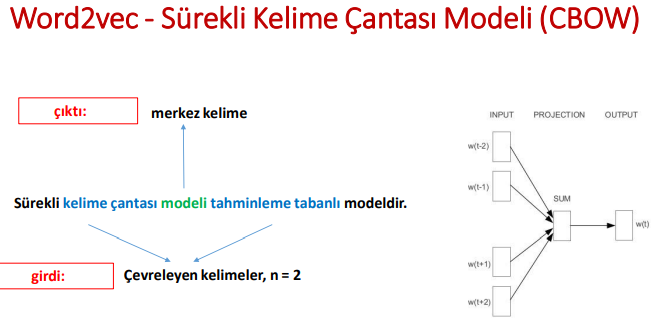

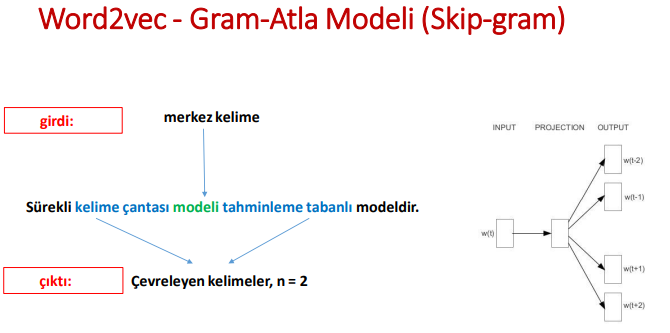

**Konu Modelleme (Topic Modelling):**

**A. Konu Modelleme Kullanım Alanları:**
• Hissiyat Analizi (Sentiment Analysis)
• Biyoinformatik (Bioinformatics)
• Chatbots
• Spam Filtreleme (Spam Filtering)

**B. Konu Modelleme Yöntemleri:** Müşteri memnuniyeti için, Hızlı bir şekilde problemi anlamak, Hızlı bir şekilde doğru çözümü üretmek ,Müşteri memnuniyeti vb.


• Gizli Anlamsal Analiz (Latent Semantic Analysis - LSA)

• Negatif Olmayan Matrix Faktörizasyonu (Non Negative Matrix 
Factorization - NMF or NNMF) 

• Gizli Dirichlet Ayırımı (Latent Dirichlet Allocation - LDA)

• Pachinko Dağılım Modeli (Pachinko Allocation Model)


**Gizli Dirichlet Ayrımı (LDA)**

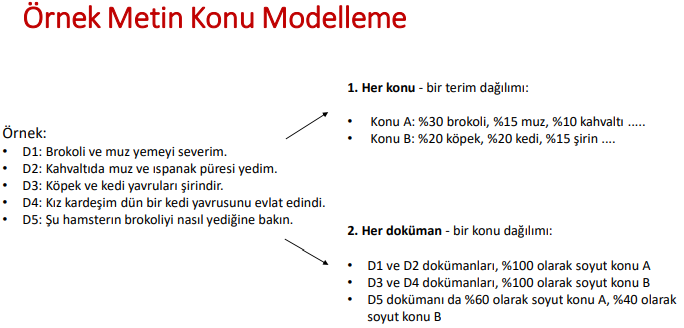

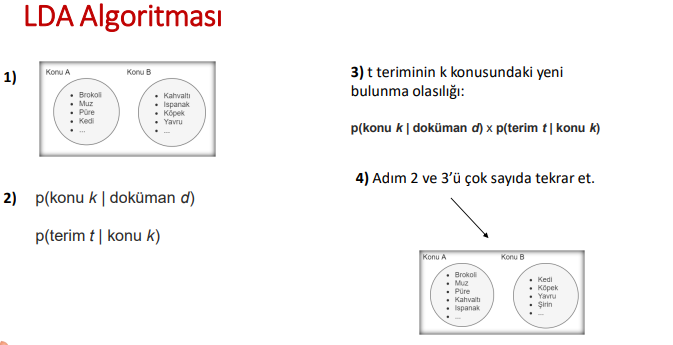

#Uygulama

In [ ]:
#Haber Veri Seti Üzerinde Konu Modellemesi

import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_excel("turkish_news_70000.xlsx",index_col = "id")

In [ ]:
df.head(3)

,main_image,published,site,text,title,url,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# LDA modelinde sadece "text" sütununu kullanmamız yeterli olacaktır.
haber_veriseti = df[["text"]]
haber_veriseti.head(3)

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."


In [ ]:
# Başlıca Veri Temizleme İşlemleri
# 1) Verisetindeki tüm harfleri küçük duruma getirmek
# 2) Noktalama işaretlerini kaldırmak
# 3) Etkisiz kelimeleri  (stopwords) kaldırmak. Örnek: ve, için, ama, çok, vb.

In [ ]:
#Veri setini temizleme işlemi için , bir fonksiyon tanımlayalım ve
#bu fonksiyonu bütün veri üzerinde uygulayalım 
#öncesinde noktalama işaretleri ve stopwords kümelerini tanımlayalım
import re 
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nok_isaretleri_kümesi = string.punctuation
# nltk kütüphanesinin etkisiz kelimeler kümesini kullanalım 
etkisiz_kelimeler_kümesi = stopwords.words('turkish') 
# stopwords kümesine biz de istediğimiz kelimeleri ekleyebiliriz
# Örnek:
etkisiz_kelimeler_kümesi.extend(["bir","kadar","sonra"])

In [ ]:
def veri_temizleme(metin):
    # Metindeki tüm harfleri küçük duruma getirir.
    metin = metin.lower()
    # Verisetimizdeki yeni satır karekterleri, boşluk karekteriyle değiştirdik.  
    metin = metin.replace("\\n"," ")
    # Kesme işareti ve sonrasındaki karekterlerin kaldırılması
    metin = re.sub("’(\w+)", "", metin) 
    metin = re.sub("'(\w+)", "", metin) 
    metin = re.sub("[“,‘,’,”]", "", metin) 
    # Sayıların Kaldırılması
    metin = re.sub("[0-9]+", "", metin)
    # Noktalama işaretlerinin kaldırılması
    metin = "".join(list(map(lambda x:x if x not in nok_isaretleri_kümesi else " ", metin)))
    # Etkisiz kelimelerin bir kısmının kaldırılması
    metin = " ".join([i for i in metin.split() if i not in etkisiz_kelimeler_kümesi])
    # Metinde tek kalan harfleri de çıkartalım
    metin = " ".join([i for i in metin.split() if len(i) > 1])
    
    return metin

In [ ]:
haber_veriseti["temizlenen_metin"] = haber_veriseti["text"].apply(lambda x:veri_temizleme(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Ham Metin - Temizlenmiş Metin Örneği
haber_veriseti.iloc[5].text

'"Şubat ayında ihracat yüzde 3.7 arttı, ithalat yüzde 18.7 azaldı 04/03/2019 12:20\\nTicaret Bakanı Ruhsar Pekcan şubat ayında ihracatın yüzde 3.7 artışla 14 milyar 312 milyon dolar, ithalatın yüzde 18.7 azalışla 16 milyar 161 milyon dolar olarak gerçekleştiğini açıkladı. Fotoğraf: Reuters\\nBakan Pekcan şunları söyledi: “ Eskiden kullandığımız Özel Ticaret Sistemine göre de şubat ayında ihracatımız yüzde 3,5 artışla 13 milyar 603 milyon dolar olarak gerçekleşmiştir. ÖTS’ye göre ithalatımız şubat ayında yüzde 16,6 düşüşle 15 milyar 793 milyon dolar seviyesinde gerçekleşmiştir. ” Reklam"'

In [ ]:
haber_veriseti.iloc[5].temizlenen_metin

'şubat ayında ihracat yüzde arttı ithalat yüzde azaldı ticaret bakanı ruhsar pekcan şubat ayında ihracatın yüzde artışla milyar milyon dolar ithalatın yüzde azalışla milyar milyon dolar olarak gerçekleştiğini açıkladı fotoğraf reuters bakan pekcan şunları söyledi eskiden kullandığımız özel ticaret sistemine göre şubat ayında ihracatımız yüzde artışla milyar milyon dolar olarak gerçekleşmiştir öts göre ithalatımız şubat ayında yüzde düşüşle milyar milyon dolar seviyesinde gerçekleşmiştir reklam'

In [ ]:
# Metin Tokenize Etme İşlemi 
haber_veriseti["temizlenen_metin_token"] = haber_veriseti["temizlenen_metin"].apply(lambda x: x.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Temizlenmiş ve tokenize edilmiş metinleri de haber_veriseti dataframe'ine ekledik
# İlk on satır örnek
haber_veriseti.head(10)

,text,temizlenen_metin,temizlenen_metin_token
id,,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...,"[pi̇ar, araştırma, adana, antalya, millet, itt..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...,"[ağrı, i̇yi̇, partililerin, istifa, gerekçesi,..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."
72342,"""Şubat ayında ihracat yüzde 3.7 arttı, ithalat...",şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
72343,"""YSK Başkanı Güven'den 'seçim güvenliği' açıkl...",ysk başkanı güven güvenliği açıklaması şubat c...,"[ysk, başkanı, güven, güvenliği, açıklaması, ş..."
72344,"""Hapisten çıkmasın diye kızları intihara kalkı...",hapisten çıkmasın kızları intihara kalkışmıştı...,"[hapisten, çıkmasın, kızları, intihara, kalkış..."
72345,"""Yavaş’tan Özhaseki’ye: Tecrübeyse, Gökçek dah...",yavaş özhaseki tecrübeyse gökçek tecrübeliydi ...,"[yavaş, özhaseki, tecrübeyse, gökçek, tecrübel..."


In [ ]:
#  LDA Model Eğitimi
!pip install pyLDAvis
import gensim

# LDA Konu Modellemesi figürsel gösterimi için kullanılan kütüphane 
import pyLDAvis.gensim_models as gensimvis


     |████████████████████████████████| 1.7 MB 11.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 190 kB/s 
     |████████████████████████████████| 11.3 MB 51.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=03e9a462814935594df5abc6810333254b3d66f96b7f35e6114753e5a18495f2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# Kelime Listesi - Dictionary Oluşturulması
tokenlastirilmis_metinler = haber_veriseti["temizlenen_metin_token"]
kelime_listesi = gensim.corpora.Dictionary(tokenlastirilmis_metinler)

#Kelime Listesi Filtreleme
kelime_listesi.filter_extremes(no_below=1, no_above=0.7)

In [ ]:
# Terimlerin Vektörleştirilmesi -- Doküman-Terim Matrisinin Oluşturulması
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in tokenlastirilmis_metinler]

In [ ]:
# LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                           id2word = kelime_listesi,
                                           num_topics = 15, 
                                           passes = 10)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
#Sonuçlar 

# Oluşturulan soyut konular içerisinde en fazla bulunan terimler
konular = lda_model.print_topics(num_words=7) 

for konu in konular:
    print(konu)

(0, '0.032*"yakala" + 0.028*"co" + 0.017*"hürriyet" + 0.012*"gün" + 0.008*"gazetesi" + 0.008*"lüks" + 0.008*"türkiye"')
(1, '0.008*"fetö" + 0.007*"hakkında" + 0.006*"ceza" + 0.006*"pakistan" + 0.006*"yıl" + 0.006*"hapis" + 0.005*"sanık"')
(2, '0.007*"ticaret" + 0.006*"türkiye" + 0.005*"olarak" + 0.005*"avrupa" + 0.005*"ab" + 0.005*"i̇ngiltere" + 0.005*"çin"')
(3, '0.017*"abd" + 0.010*"türkiye" + 0.007*"başkanı" + 0.006*"suriye" + 0.006*"trump" + 0.005*"olarak" + 0.005*"i̇ran"')
(4, '0.014*"son" + 0.011*"haber" + 0.011*"iframe" + 0.011*"haberler" + 0.010*"com" + 0.010*"tarih" + 0.009*"www"')
(5, '0.007*"olay" + 0.007*"haberler" + 0.006*"tarafından" + 0.006*"ilgili" + 0.005*"polis" + 0.005*"yazdır" + 0.004*"yerel"')
(6, '0.007*"fenerbahçe" + 0.006*"ilk" + 0.006*"son" + 0.005*"beşiktaş" + 0.005*"galatasaray" + 0.005*"iyi" + 0.004*"takım"')
(7, '0.008*"türk" + 0.008*"pakdemirli" + 0.008*"film" + 0.007*"antarktika" + 0.006*"kültür" + 0.005*"turizm" + 0.005*"bilim"')
(8, '0.011*"var" + 0.006

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model,dokuman_terim_matrisi,kelime_listesi,mds = 'mmds')


# NOT : burada hata alıyorum vektorize edilmediğinden 



In [ ]:
#En İyi Performansı Sağlayan Konu Sayısı  Tutarlılık Skoru
from gensim.models import CoherenceModel

konu_sayisi_aralik_listesi = range(9,30,3)

In [ ]:
tutarlilik_skorlar_listesi = list()
konu_sayisi_listesi = list()

for konu_sayisi in konu_sayisi_aralik_listesi:
    lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                               id2word = kelime_listesi,
                                               num_topics = konu_sayisi, 
                                               passes = 10)
    
    tutarlilik_model_lda = CoherenceModel(model=lda_model, texts=tokenlastirilmis_metinler, 
                                          dictionary=kelime_listesi, coherence='c_v')
    gecici_tutarlilik_skoru_lda = tutarlilik_model_lda.get_coherence()
    tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
    konu_sayisi_listesi.append(konu_sayisi)

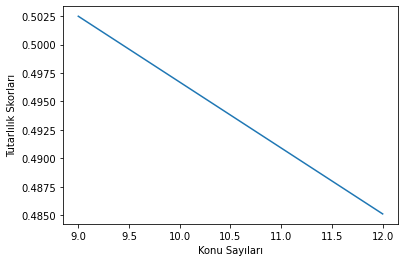

In [ ]:
#Tutarlılık Skoru Görselleştirme
import matplotlib.pyplot as plt

plt.plot(konu_sayisi_listesi, tutarlilik_skorlar_listesi, "-"),
plt.xlabel("Konu Sayıları")
plt.ylabel("Tutarlılık Skorları")

plt.show()

In [ ]:
# LDA Model
# num_topics parametresi, görselde en iyi çıkan tutarlılık skoruna göre belirlenebilir. 
# En yüksek tutarlılık sokurunu veren konu sayısı seçilebilir.

lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                           id2word = kelime_listesi,
                                           num_topics = 25, 
                                           passes = 10)

In [ ]:
# Oluşturulan soyut konular içerisinde en fazla bulunan terimler
konular = lda_model.print_topics(num_words=7) 
konular = sorted(konular, key = lambda x: x[0]) 
for konu in konular:
    print(konu)

(0, '0.013*"cuma" + 0.013*"sokak" + 0.012*"köy" + 0.011*"merkez" + 0.010*"mahalle" + 0.010*"belde" + 0.007*"katar"')
(1, '0.014*"bin" + 0.006*"kurum" + 0.005*"bakanlığı" + 0.005*"başvuru" + 0.005*"olarak" + 0.005*"tarafından" + 0.005*"olan"')
(2, '0.023*"pakistan" + 0.021*"hindistan" + 0.008*"keşmir" + 0.008*"next" + 0.006*"hava" + 0.006*"efes" + 0.005*"iki"')
(4, '0.015*"var" + 0.013*"ben" + 0.009*"değil" + 0.008*"yok" + 0.007*"benim" + 0.006*"mi" + 0.006*"böyle"')
(5, '0.008*"paylaş" + 0.007*"su" + 0.005*"teknoloji" + 0.004*"bulut" + 0.004*"olan" + 0.004*"yarışması" + 0.003*"çay"')
(6, '0.012*"savunma" + 0.011*"hava" + 0.010*"suudi" + 0.008*"arabistan" + 0.005*"akar" + 0.005*"kara" + 0.005*"bin"')
(7, '0.006*"yıl" + 0.005*"olduğu" + 0.005*"hapis" + 0.005*"polis" + 0.005*"üzerine" + 0.005*"ceza" + 0.005*"olay"')
(8, '0.015*"kar" + 0.012*"lira" + 0.012*"hava" + 0.011*"bin" + 0.009*"deprem" + 0.008*"nedeniyle" + 0.007*"göre"')
(9, '0.015*"türkiye" + 0.009*"erdoğan" + 0.008*"dedi" + 0.00

In [ ]:
pyLDAvis.enable_notebook()
gorsel = pyLDAvis.gensim.prepare(lda_model, dokuman_terim_matrisi, kelime_listesi, mds='mmds')
pyLDAvis.display(gorsel)

#4.Doğal Dil işlemede Derin Öğrenme

**Özyinelemeli Yapay Sinir Ağları (RNN)**

•  Dizilim Modelleri (Sequence Models):

-Sıralı olan girdiler: Zaman serisi verileri, konuşma verileri, yazı verisi, video verisi. Geçmiş girdilerden gelen bilgiler kısaca.

•  Kullanım Alanları :  Birçok DDİ probleminin çözümünde
yer alırlar:Dil Modelleme(cümlenin dile uygunluğunu ölçme,Sıradaki kelimeyi tahmin etme yapılır.kulanılan İstatiksel Yöntemler: N-gram dil modelleri, Markov Varsayımı)
,Bilgisayarlı Çeviri,Ses Tanıma,Yazım hatası düzeltme vb.

• Özyinelemeli Yapay Sinir Ağları (RNN):Dizilimler için özelleştirimiş yapay sinir ağıdır.Temel farklılığı Sıralı girdiler ve Sonsuz uzunlukta girdi. Temel avantajları Daha uzun geçmişe bakabilme ve Daha iyi genelleştirme.



• Uzun-Kısa Süreli Bellek Ağları (LSTM):

RNN deki Uzun vadeli bağımlılık (long-term dependency) ve Kaybolan gradyanlar (vanishing gradients) problemini çözmek için önerilmiş modeldir.RNN’den daha karmaşık bir yapısı var. Sorunları :Uzun vadeli bağımlılık ,Karmaşık (fazla sayıda parametre),Paralel hesaplama,Soldan-sağa bağlam – Sağdan-sola bağlam Çözüm: Çiftyönlü (Bidirectional) LSTM.


• Dönüştürücü (Transformer):

-DDİ’de sıklıkla kullanılır.
-Paralel hesaplama problemini çözer.
-Uzun vadeli bağımlılık - büyük ölçüde çözer.
-Encoder (Kodlayıcı) – Decoder (Kod çözücü)
-Öz-Dikkat Mekanizması (Self-Attention)
-Pozisyon (zaman) bilgisini korumak için 
pozisyonel kodlama.

Örnekler:

Visual Question Answering (VQA): Evrişimsel Sinir Ağları + LSTM

GPT, GPT-2, GPT-3: Dönüştürücülerle genel eğitim + problem odaklı ‘fine-tune’



#Uygulama HİSSİYAT ANALİZİ (SENTIMENT CLASSIFICATION)

In [ ]:
import pandas as pd  
data = pd.read_csv("rewiews.txt",delimiter="\t")
data= data.sample(frac=1).reset_index(drop=True)
data.head()